<h2>Caminante aleatorio</h2><br>
<p><b>Juan Uriel Legaria Peña</b></p><br>
<p><b>Inteligencia artificial</b></p><br>


In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [3]:

class RandomWalker:
    #Possible directions
    dirs = np.array([[1,0],[-1,0],[0,1],[0,-1]])
    def getRandomDir(self):
        return random.choice(self.dirs)
    def randomWalk(self,steps):
        vecs = np.zeros((steps,2))
        #Start at the origin
        vecs[0,:] = [0,0]
        for i in range(1,steps):
            vecs[i,:] = vecs[i-1,:] + self.getRandomDir()
        
        return vecs
    
    def avgDistanceExperiments(self,steps,experiments):
        expDistances = np.zeros((experiments,1))
        for i in range(0, experiments):
            exp = self.randomWalk(steps)
            r = exp[steps-1,:]
            d = np.sqrt(r[0]**2+r[1]**2)
            expDistances[i] = d
        return np.mean(expDistances)
        
class WalkerAnimator:
    
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.walker = RandomWalker()
    
    def animateRandomWalk(self, steps):
        rw = self.walker.randomWalk(steps)
        self.dist = np.sqrt(steps)
        self.randWalkX = rw[:,0]
        self.randWalkY = rw[:,1]
        anim = FuncAnimation(self.fig, self.plotTrack,frames=len(self.randWalkX)-1, interval=50, blit=False)
        return HTML(anim.to_html5_video())
        #anim.save('sine_wave.gif', writer='imagemagick')
    
    def plotTrack(self,i):
        self.ax.clear()
        self.ax.set_xlim(-self.dist, self.dist)
        self.ax.set_ylim(-self.dist,self.dist)
        self.ax.plot(self.randWalkX[0:i],self.randWalkY[0:i],linewidth=2)
        
    

### Animación de la caminata aleatoria

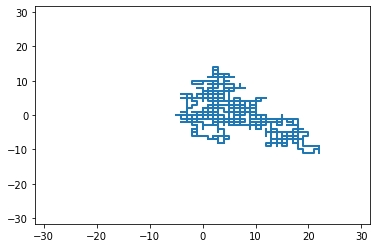

In [4]:
#Test our animation class

walkAnim = WalkerAnimator()
walkAnim.animateRandomWalk(1000)


### Experimento de caminata aleatoria para obtener distancia promedio

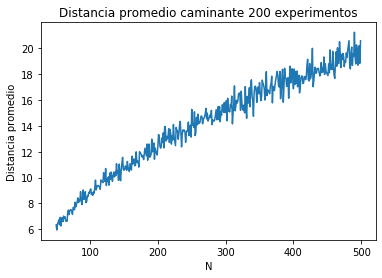

In [11]:
walker = RandomWalker()
experiments = 200
n = range(50,500)
averageDistances = np.zeros((len(n),1))

for i in range(0,len(n)):
    averageDistances[i] = walker.avgDistanceExperiments(n[i],experiments)

plt.figure()
plt.title("Distancia promedio caminante " + str(experiments) + " experimentos")
plt.xlabel("N")
plt.ylabel("Distancia promedio")
plt.plot(n,averageDistances)



Ahora vamos a establecer al hipótesis de que la relación que sigue la gráfica anterior es una ley de potencias:

\begin{equation}
D = aN^{b}
\end{equation}

Sacando logaritmo a ambos lados se tiene:
\begin{equation}
\log{D} = \log{a}+ b\log{N}
\end{equation}

Para obtener la potencia $b$ podriamos entonces hacer un ajuste lineal a los datos $(\log{N},\log{D})$ y ver como es la pendiente obtenida. 

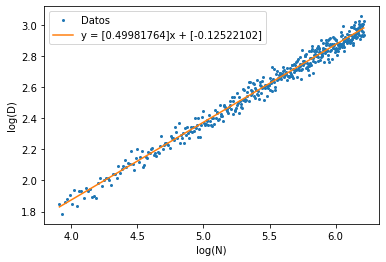

In [12]:
logN = np.log(n)
logD = np.log(averageDistances)

m, b = np.polyfit(logN, logD, 1)
x = np.linspace(np.min(logN),np.max(logN),100)
y = m*x + b

plt.figure()
plt.xlabel("log(N)")
plt.ylabel("log(D)")
plt.plot(logN,logD,'o',markersize = 2,label = "Datos")
plt.plot(x,y,label = "y = "+str(m)+"x + "+str(b))
plt.legend()

Vemos que la potencia es cercana a 0.5 por lo cual deducimos que 

$$D \propto \sqrt{N}$$

### Razonamiento teórico

Vamos a intentar obtener una justa
\begin{equation}
X = \begin{cases}
1 & p = \frac{1}{2}\\
-1 & p = \frac{1}{2}
\end{cases}
\end{equation}

\begin{equation}
Y = \begin{cases}
1 & p = \frac{1}{2}\\
-1 & p = \frac{1}{2}
\end{cases}
\end{equation}

Entonces la distancia al cuadrado despues de $N$ pasos podría ser descrita por la siguiente variable aleatoria

\begin{equation}
D^2 = \left(\sum_{i = 1}^{N} X_{i}\right)^2 + \left(\sum_{i = 1}^{N} Y_{i}\right)^2
\end{equation}
Esto también lo podemos escribir como 
\begin{equation}
D^2 = \sum_{i}X_{i}^2 + \sum_{i,j \\ i \neq j}X_{i}X_{j} + \sum_{i}Y_{i}^2 + \sum_{i,j \\  i \neq j}Y_{i}Y_{j}
\end{equation}
Ahora notemos que el valor esperado de las variables $X^2$ y $Y^2$ es:

\begin{equation}
E[X^2] = E[Y^2] = \frac{1}{2}(1) + \frac{1}{2}(1) = 1
\end{equation}

Otra cosa a notar es que como el valor de estas variables en un paso $N$ no determina en ninguna forma su valor para el paso siguiente entonces para i, j diferentes $X_{i}$ y $X_{j}$ son independientes 

$$p(X_{i},X_{j}) = p(X_{i})p(X_{j})$$

Y por consiguiente:

$$E[X_{i}X_{j}] = (1)(-1)p(1)p(-1) + (-1)(1)p(-1)p(1) + (1)(1)p(1)p(1) +(-1)(-1)p(-1)p(-1) = -\frac{1}{4}-\frac{1}{4} +\frac{1}{4} + \frac{1}{4} = 0$$

Por lo tanto el valor esperado de $D^2$ sería 

\begin{align*}
E[D^2] &= \sum_{i}E[X_{i}^2] + \sum_{i,j \\ i \neq j}E[X_{i}X_{j}] + \sum_{i}E[Y_{i}^2] + \sum_{i,j \\  i \neq j}E[Y_{i}Y_{j}]\\
&= \sum_{i = 1}^N 1 + 0 +\sum_{i = 1}^N 1 + 0 = 2N\\
\implies & E[D^2] = 2N
\end{align*}

Esto da pie a la suposición razonable de que si $E[D^2] = 2N$ entonces

\begin{equation}
E[D] \propto \sqrt{N}
\end{equation}
